Modelo de Fase Fenotipica con los valores de flujos ajustados en referencias en el modelo iHN637.xml en *Clostridium ljungdahlii*
=============================================================

In [1]:
import cobra
import numpy as np
import matplotlib.pyplot as plt
import re

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from cobra.flux_analysis import production_envelope
from numpy import zeros 



In [2]:
model= cobra.io.load_matlab_model(
    "12934_2013_907_MOESM6_ESM")

In [3]:
print "Objective funtion", model.objective
print "====================================================================================================="

print "Simulación  de la distribución de fluxes usando FBA y resumen de los fluxes de sustratos, productos, y reacción de biomasa" 
print "             "
solution = model.optimize()
model.summary()
print "======================================================================================================"

Objective funtion Maximize
1.0*Cl_biomass_DSM_WT_46p666M1 - 1.0*Cl_biomass_DSM_WT_46p666M1_reverse_bcddb
Simulación  de la distribución de fluxes usando FBA y resumen de los fluxes de sustratos, productos, y reacción de biomasa
             
IN FLUXES           OUT FLUXES    OBJECTIVES
------------------  ------------  ----------------------
h2[e]   100         h2o[e]  55    Cl_biomass_D...  0.189
co2[e]   48.6       h[e]    21.3
nh4[e]    1.43      ac[e]   20.2
pi[e]     0.218
k[e]      0.036
so4[e]    0.0356
fe2[e]    0.00261
mg2[e]    0.0016
ca2[e]    0.000961
cl[e]     0.000961
fol[e]    0.000168
cu2[e]    0.000131
mn2[e]    0.000128


In [4]:
%matplotlib inline
prod_env = production_envelope(model, ["EX_co2(e)", "EX_h2(e)"])
prod_env.head(23)

,carbon_source,carbon_yield_maximum,carbon_yield_minimum,flux_maximum,flux_minimum,mass_yield_maximum,mass_yield_minimum,EX_co2(e),EX_h2(e)
0,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",1.603825,0.0,0.157355,0.0,NaN,NaN,-50.000000,-100.000000
1,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",0.928564,0.0,0.091100,0.0,NaN,NaN,-50.000000,-94.863158
2,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",0.253254,0.0,0.024846,0.0,NaN,NaN,-50.000000,-89.726316
3,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.000000,-84.589474
4,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.000000,-79.452632
5,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.000000,-74.315789
6,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.000000,-69.178947
7,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.000000,-64.042105
8,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.000000,-58.905263
9,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.000000,-53.768421


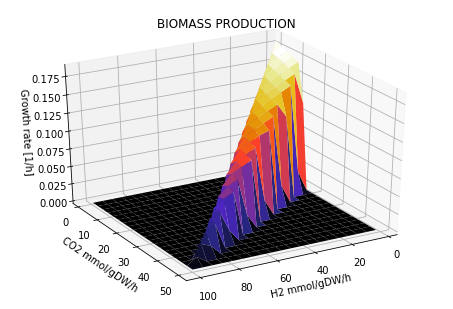

In [5]:
X      = np.unique(-1*prod_env["EX_h2(e)"])     
Y      = np.unique(-1*prod_env["EX_co2(e)"])         
data_Z = prod_env["flux_maximum"]


num_dat= len(X)                                  
matriz = np.zeros((num_dat,num_dat))
for i in range(num_dat):
    matriz[i,:] = data_Z[num_dat*i:num_dat*(i+1)]
matriz[np.isnan(matriz)] = 0.0                   



fig  = plt.figure()
ax   = Axes3D(fig)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, matriz, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=plt.cm.CMRmap)

ax.view_init(elev =None, azim =60)
ax.set_xlabel("H2 mmol/gDW/h")
ax.set_ylabel("CO2 mmol/gDW/h")
ax.set_zlabel("Growth rate [1/h]")
plt.title("BIOMASS PRODUCTION")


plt.show()

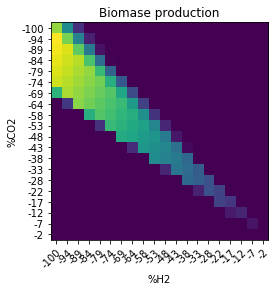

In [6]:
xlabels=np.unique(prod_env['EX_h2(e)'])
ylabels=np.unique(prod_env["EX_co2(e)"])

Xint=list(np.int_(xlabels))
Yint=list(np.int_(xlabels))

mat=np.zeros((20,20))
for i in range(20):
    mat[i,0:20]=prod_env["flux_maximum"][i*20:(i+1)*20]

fig,ax=plt.subplots()
ax.set_xticks(np.arange(len(Xint)))
ax.set_yticks(np.arange(len(Yint)))

ax.set_xticklabels(Xint)
ax.set_yticklabels(Yint)    
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Biomase production")
ax.set_ylabel("%CO2")
ax.set_xlabel("%H2")
mat[np.isnan(mat)]=0
ax.imshow(mat)

In [7]:
Vp= np.array([solution.fluxes["EX_etoh(e)"]])
Vr= np.array([6])

d= (Vr-Vp)/Vr

Ecludian_norm = np.dot(d,d)


print "Norma euclidiana de los datos =", Ecludian_norm
    

Norma euclidiana de los datos = 1.0


In [8]:
solution.fluxes["EX_etoh(e)"]

0.0

In [9]:
((9.29-20.02)/9.29)**2

1.3340374327523263

In [10]:
0.0384615384615385**2

0.0014792899408284052